# 낙동강 수질 항목을 활용한 물 혼합 여부 예측

## By OPTIMUM
***
고객님 찾아주셔서 감사합니다. 최선을 다해 모델링을 진행하였으며 코드는 아래와 같습니다.

궁금하신점은 언제나 연락주시면 감사하곘습니다!

In [224]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [225]:
data = pd.read_csv('혼합.csv', encoding = 'cp949')

In [226]:
data.head()

,Unnamed: 0,BOD,T-P,T-N,TOC,혼합
0,NG1좌,4.22,4.03,0.086,3.5,0
1,NG1중,3.04,2.31,0.079,3.0,1
2,NG1우,2.67,1.78,0.069,2.9,0
3,NG2좌,3.81,2.24,0.075,3.0,2
4,NG2중,2.79,2.00,0.081,2.9,0


In [227]:
import re

In [228]:
data['Unnamed: 0'] = data['Unnamed: 0'].str.replace('4', '5')
data['Unnamed: 0'] = data['Unnamed: 0'].str.replace('3', '4')
data['Unnamed: 0'] = data['Unnamed: 0'].str.replace('p', '3')

Unnamed: 0 컬럼에 p 변수를 3으로 바꾸고 기존의 3, 4를 각각 4, 5로 변환해 줍니다.

In [229]:
data['상하류'] = [int(re.sub(r'[^0-9]', '', x)) for x in data['Unnamed: 0']]

상하류 변수를 만들어 줍니다. Unnamed: 0 컬럼에서 숫자만 추출

In [230]:
data['T-P'] = np.log1p(data['T-P'])

T-P 컬럼은 로그 변환시 정규분포를 만족하므로 로그변환을 해줍니다.

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

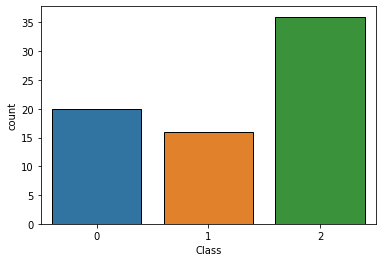

In [232]:
sns.countplot(data.혼합, edgecolor = (0, 0, 0))
plt.xlabel('Class')
plt.show()

#### feature와 target을 분리합니다.

In [233]:
X = data.drop(['Unnamed: 0', '혼합'], axis = 1)
y = data.혼합

In [234]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [235]:
skf = StratifiedKFold(n_splits = 10, random_state = 611, shuffle = True)

학습 및 검증을 동시에 하기 위해 KFold를 사용하는데 분류 문제이므로 StratifiedKFold를 사용합니다.

데이터를 총 10개로 나눈 후 9개의 묶음에 속하는 데이터로 학습을 진행하고 1개 묶음의 데이터로 검증을 진행합니다.

### SVC

In [236]:
svc = SVC(C = 10, probability= True)

In [237]:
acc_list = []
i = 0
for tr_idx, val_idx in skf.split(data, y) :
    i += 1
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    svc.fit(tr_x, tr_y)
    
    pred = svc.predict(val_x)
    
    acc = round(accuracy_score(val_y, pred), 3)
    acc_list.append(acc)
    print(f'{i} FOLD의 정확도는 {acc}')
print(f'\n10FOLD 평균 정확도는 {round(np.mean(acc_list), 3) * 100}%')

1 FOLD의 정확도는 0.375
2 FOLD의 정확도는 0.625
3 FOLD의 정확도는 0.571
4 FOLD의 정확도는 0.286
5 FOLD의 정확도는 0.571
6 FOLD의 정확도는 0.429
7 FOLD의 정확도는 0.571
8 FOLD의 정확도는 0.857
9 FOLD의 정확도는 0.714
10 FOLD의 정확도는 0.857

10FOLD 평균 정확도는 58.599999999999994%


### DecisionTreeRegressor

In [238]:
dtr = DecisionTreeClassifier(random_state = 611, max_depth = 3)

In [239]:
acc_list = []
i = 0
for tr_idx, val_idx in skf.split(data, y) :
    i += 1
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    dtr.fit(tr_x, tr_y)
    
    pred = dtr.predict(val_x)
    
    acc = round(accuracy_score(val_y, pred), 3)
    acc_list.append(acc)
    print(f'{i} FOLD의 정확도는 {acc}')
print(f'\n10FOLD 평균 정확도는 {round(np.mean(acc_list), 3) * 100}%')

1 FOLD의 정확도는 0.25
2 FOLD의 정확도는 0.5
3 FOLD의 정확도는 0.714
4 FOLD의 정확도는 0.429
5 FOLD의 정확도는 0.429
6 FOLD의 정확도는 0.429
7 FOLD의 정확도는 0.571
8 FOLD의 정확도는 0.571
9 FOLD의 정확도는 0.714
10 FOLD의 정확도는 0.571

10FOLD 평균 정확도는 51.800000000000004%


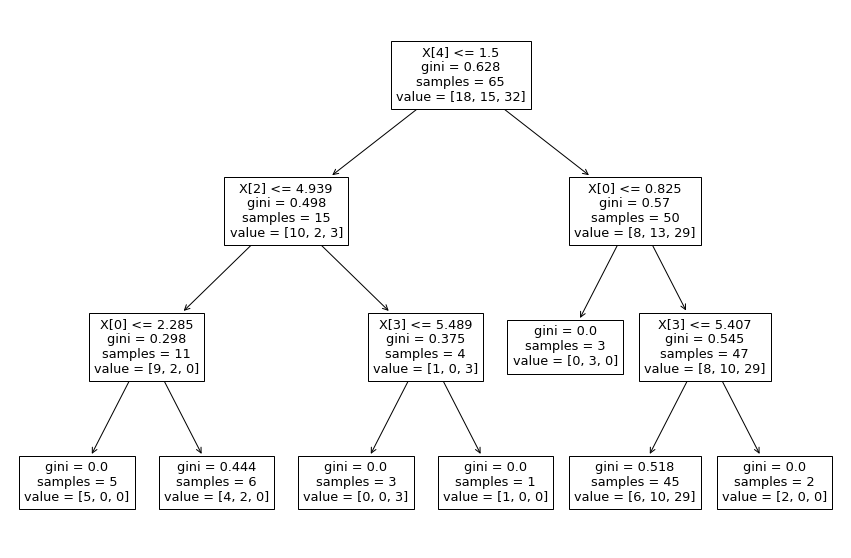

In [240]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 10))
plot_tree(dtr)
plt.show()

### RandomForestClassifier

In [241]:
rf = RandomForestClassifier(random_state = 611, max_depth = 4)

In [242]:
acc_list = []
i = 0
for tr_idx, val_idx in skf.split(data, y) :
    i += 1
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = rf.predict(val_x)
    
    acc = round(accuracy_score(val_y, pred), 3)
    acc_list.append(acc)
    print(f'{i} FOLD의 정확도는 {acc}')
print(f'\n10FOLD 평균 정확도는 {round(np.mean(acc_list), 3) * 100}%')

1 FOLD의 정확도는 0.25
2 FOLD의 정확도는 0.625
3 FOLD의 정확도는 0.857
4 FOLD의 정확도는 0.571
5 FOLD의 정확도는 0.571
6 FOLD의 정확도는 0.714
7 FOLD의 정확도는 0.714
8 FOLD의 정확도는 0.571
9 FOLD의 정확도는 0.714
10 FOLD의 정확도는 0.714

10FOLD 평균 정확도는 63.0%


### GradientBoostingClassifier

In [243]:
gb = GradientBoostingClassifier(random_state = 611, max_depth = 4)

In [244]:
acc_list = []
i = 0
for tr_idx, val_idx in skf.split(data, y) :
    i += 1
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    gb.fit(tr_x, tr_y)
    
    pred = gb.predict(val_x)
    
    acc = round(accuracy_score(val_y, pred), 3)
    acc_list.append(acc)
    print(f'{i} FOLD의 정확도는 {acc}')
print(f'\n10FOLD 평균 정확도는 {round(np.mean(acc_list), 3) * 100}%')

1 FOLD의 정확도는 0.25
2 FOLD의 정확도는 0.75
3 FOLD의 정확도는 0.857
4 FOLD의 정확도는 0.429
5 FOLD의 정확도는 0.571
6 FOLD의 정확도는 0.429
7 FOLD의 정확도는 0.286
8 FOLD의 정확도는 0.571
9 FOLD의 정확도는 0.571
10 FOLD의 정확도는 0.571

10FOLD 평균 정확도는 52.800000000000004%


#### 추가 권장 사항

고객님 우선 성능을 향상시키기 위해서는 데이터의 수가 절대적으로 중요합니다. 향후 계획에서 데이터를 추가로 확보하실 수 있으시다면 지금 보다 훨씬 더 좋은 성능을 낼 수 있을 것 입니다. 또한 단일 모델이 아닌 앙상블이라는 기법을 활용한다면 일반적으로 성능을 더 올릴 수 있는데 아래 예시를 참고해 주세요! 

SVM 모델을 앙상블에 활용하기 위해서는 인자에 probability = True가 추가 되어야 합니다!

In [245]:
from sklearn.ensemble import VotingClassifier

In [246]:
vot = VotingClassifier(estimators = [('svc', svc), ('rf', rf), ('dtr', dtr)], voting = 'soft')

In [247]:
acc_list = []
i = 0
for tr_idx, val_idx in skf.split(data, y) :
    i += 1
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    vot.fit(tr_x, tr_y)
    
    pred = vot.predict(val_x)
    
    acc = round(accuracy_score(val_y, pred), 3)
    acc_list.append(acc)
    print(f'{i} FOLD의 정확도는 {acc}')
print(f'\n10FOLD 평균 정확도는 {round(np.mean(acc_list), 3) * 100}%')

1 FOLD의 정확도는 0.25
2 FOLD의 정확도는 0.5
3 FOLD의 정확도는 0.857
4 FOLD의 정확도는 0.429
5 FOLD의 정확도는 0.571
6 FOLD의 정확도는 0.429
7 FOLD의 정확도는 0.571
8 FOLD의 정확도는 0.571
9 FOLD의 정확도는 0.714
10 FOLD의 정확도는 0.571

10FOLD 평균 정확도는 54.6%


데이터가 많이 확보된 이후 만든 모델로 미지의 데이터의 혼합 값을 예측하려면 지금과 같이 이진 분류가 아닌 예측값의 종류가 3개 이상인 경우 다음과 같은 코드를 사용할 수 있습니다.

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 611, stratify = y)

고객님께서 학습에 사용할 데이터를 X_train, y_train라고 가정하고

미지의 데이터를 X_test라고 가정하겠습니다.

변수 이름에는 집중하지 마세요!

예측 변수는 3가지 값을 가지므로 우선 최종 예측 파일을 (예측 데이터의 행 수) * (3) 모양의 모든 값이 0인 행렬을 만들어줍니다.

In [249]:
acc_list = []
i = 0
sub_pred = np.zeros((X_test.shape[0], 3)) # (예측 데이터의 행 수) * (3) 모양의 0행렬 생성
for tr_idx, val_idx in skf.split(X_train, y_train) :
    i += 1
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = rf.predict_proba(val_x) # 클래스별 예측 확률을 구해줍니다.
    pred = [np.argmax(x) for x in pred] # 클래스별 예측 확률 중 가장 높은 값의 클래스를 최종 값으로 지정합니다.
    
    acc = round(accuracy_score(val_y, pred), 3)
    acc_list.append(acc)
    print(f'{i} FOLD의 정확도는 {acc}') # 실제 고객님께서 혼합 여부까지 가지고 있는 데이터로 학습한 모델의 정확도 입니다.
    
    rf_pred = rf.predict_proba(X_test) # 이제 혼합 여부가 존재하지 않는 미지의 데이터에 대해서 클래스별 확률을 예측합니다.
    rf_pred = rf_pred / 10 # 데이터를 10개로 나누어서 학습을 했으므로 앙상블을 위해 값을 10으로 나누어 줍니다.
    sub_pred += rf_pred # 0행렬에 값을 더해줍니다.
print(f'\n10FOLD 평균 정확도는 {round(np.mean(acc_list), 3) * 100}%')

1 FOLD의 정확도는 0.333
2 FOLD의 정확도는 0.667
3 FOLD의 정확도는 0.667
4 FOLD의 정확도는 0.5
5 FOLD의 정확도는 0.333
6 FOLD의 정확도는 0.333
7 FOLD의 정확도는 0.333
8 FOLD의 정확도는 0.8
9 FOLD의 정확도는 0.2
10 FOLD의 정확도는 0.6

10FOLD 평균 정확도는 47.699999999999996%


In [250]:
sub_pred # 고객님께서 추후에 예측하고자 하는 미지의 데이터의 클래스별 확률입니다.

array([[0.64149033, 0.04928302, 0.30922665],
       [0.24508437, 0.20191104, 0.55300459],
       [0.44439357, 0.37223387, 0.18337256],
       [0.04901758, 0.30672189, 0.64426054],
       [0.42866667, 0.11419051, 0.45714282],
       [0.08381963, 0.17826818, 0.73791218],
       [0.06969631, 0.24086463, 0.68943907],
       [0.06911006, 0.23989223, 0.69099771],
       [0.22583333, 0.16684578, 0.60732089],
       [0.19477823, 0.51916274, 0.28605903],
       [0.06869549, 0.29707625, 0.63422826],
       [0.22384889, 0.15701465, 0.61913646],
       [0.34363007, 0.15293261, 0.50343732],
       [0.4046093 , 0.16469685, 0.43069385],
       [0.2752221 , 0.22451039, 0.50026751]])

In [251]:
sub_label = [np.argmax(x) for x in sub_pred]
sub_label

[0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]

이제 각 클래스별 확률 중 가장 높은 확률의 클래스를 지정합니다.

예를 들어 위의 첫 행의 경우 0.6414, 0.049, 0.309 중에서 0.6414가 가장 높으므로 해당 클래스는 0으로 예측됩니다.

미지의 데이터는 정답 값이 없으므로 정답을 확인할 수 없겠지만 지금은 예시이므로 한번 비교를 해보곘습니다.

In [252]:
print(f'앙상블을 활용해 미지의 데이터 예측 결과 정확도는 {(accuracy_score(y_test, sub_label) * 100)}%')

앙상블을 활용해 미지의 데이터 예측 결과 정확도는 60.0%


앙상블 후 학습때의 정확도 47.699% 보다 더 높은 정확도를 보였습니다.

고객님께서 진행하고자 하는 모델링 방향에 따라 다양한 시도를 해볼 것을 추천드립니다!